# **Solving Burma 14 With GA**
# **(Parham Nayeri)**


---
[Burma 14 link](https://github.com/coin-or/jorlib/blob/master/jorlib-core/src/test/resources/tspLib/tsp/burma14.tsp)

# Save in Dictionary

*   import libraries
*   create Dictionary

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

Burma = {
    1: (16.47, 96.10),
    2: (16.47, 94.44),
    3: (20.09, 92.54),
    4: (22.39, 93.37),
    5: (25.23, 97.24),
    6: (22.00, 96.05),
    7: (20.47, 97.02),
    8: (17.20, 96.29),
    9: (16.30, 97.38),
    10: (14.05, 98.12),
    11: (16.53, 97.38),
    12: (21.52, 95.59),
    13: (19.41, 97.13),
    14: (20.09, 94.55)
}

# Create First population

In [ ]:
def Populationrand():
  lst = list(Burma.keys())
  random.shuffle(lst)
  return lst
size = int(input("Set Size for population : "))
population = [ Populationrand() for i in range(size)]


Set Size for population : 100


#Calculate Fitness


*   Calculate Distanse between each loaction
*   Sum Distanses for get Fitness



In [ ]:
def Dis(c1,c2):
  x1,y1 = Burma[c1]
  x2,y2 = Burma[c2]
  distan = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return distan
def Fitness(gen):
  return sum(Dis(gen[i], gen[i+1]) for i in range(len(gen)-2)) + Dis(gen[-1], gen[0])
# print(Fitness(population[1]))

# Roulette Wheel Function
* for selecte parents

In [ ]:
def roulette(population,fitList):
  totalFit = sum(fitList)
  chance = [fitness / totalFit for fitness in fitList]
  select = random.choices(population,weights=chance,k=2)
  return select[0],select[1]

# Create Offspring

*   select random number for break Gens
*   Create 2 offspring from 2 parents
*   replace duplicate location



In [ ]:
def offspring(p1,p2):
  s = random.randint(0,len(p1)-1)
  sp1 = p1[:s] + p2[s:]
  sp2 = p2[:s] + p1[s:]
  return checker(sp1),checker(sp2)
def checker(sp):
  for i in range(len(sp)):
    while sp.count(sp[i]) > 1 :
      sp[i] = random.randint(1,14)
  return sp

# ForLoop (for newGen)
* select genius genes from parents

In [ ]:
numGens = int(input("please enter a number for loop : "))
bestSol = None
bestDis = float('inf')
genPassed = 0
for i in range(numGens):
  fitList = []
  fitList = [Fitness(gen) for gen in population]
  sortPop = [x for _ , x in sorted(zip(fitList,population))]
  newPop = sortPop[:10]

  while len(newPop) < size :
    p1,p2 = roulette(sortPop,fitList)
    c1,c2 = offspring(p1,p2)
    newPop.append(c1)
    newPop.append(c2)

  population = newPop
  if min(fitList) < bestDis :
    genPassed = i
    bestDis = min(fitList)
    bestSol = population[fitList.index(min(fitList))]

please enter a number for loop : 1000


# ***Show the result in Graph***

Generation 37: Best Distance = 26.970065080162286
Best Solution : [4, 13, 6, 7, 8, 3, 14, 12, 2, 9, 1, 11, 10, 5]


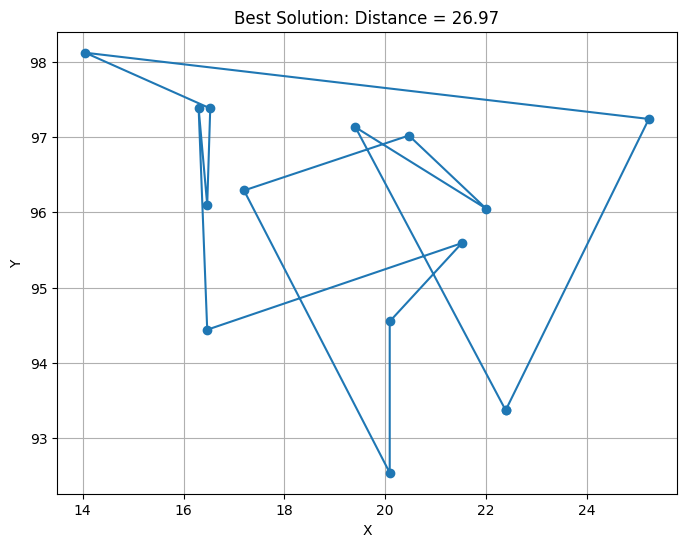

In [ ]:

print(f"Generation {genPassed}: Best Distance = {bestDis}")
print(f"Best Solution : {bestSol}")
plt.figure(figsize=(8, 6))
x_vals = [Burma[city][0] for city in bestSol] + [Burma[bestSol[0]][0]]
y_vals = [Burma[city][1] for city in bestSol] + [Burma[bestSol[0]][1]]
plt.plot(x_vals, y_vals, marker='o')
plt.title(f'Best Solution: Distance = {bestDis:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()